In [68]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# This cell downloads the costs.csv and supplements.csv files for use in exercises 3 and 5
!curl -o costs.csv https://raw.githubusercontent.com/wingated/cs180_labs/main/costs.csv
!curl -o supplements.csv https://raw.githubusercontent.com/wingated/cs180_labs/main/supplements.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   125  100   125    0     0    309      0 --:--:-- --:--:-- --:--:--   309
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   358  100   358    0     0    753      0 --:--:-- --:--:-- --:--:--   755


In [ ]:
maths = pd.Series([80,96,78,59],['Mark','Barbara','Eleanor','David'])
print(maths)


Mark       80
Barbara    96
Eleanor    78
David      59
dtype: int64


In [ ]:
#Exercise 1
english = pd.Series([90, 87, 97, 65], ['Mark', 'Barbara', 'Eleanor', 'David'])
print(english)

Mark       90
Barbara    87
Eleanor    97
David      65
dtype: int64


In [ ]:
simple_grades = pd.DataFrame({'Math': maths, 'English' : english})
print(simple_grades)

         Math  English
Mark       80       90
Barbara    96       87
Eleanor    78       97
David      59       65


In [ ]:
data = np.array([[52.0, 73.0], [10.0, 39.0], [35.0, np.nan], 
                  [np.nan, 26.0], [np.nan, 99.0], [81.0, 68.0]])
grades = pd.DataFrame(data, columns = ['Math', 'English'], 
                       index = ['Barbara', 'David', 'Eleanor', 'Greg', 'Lauren', 'Mark'])



In [ ]:
# look at the column labels of grades
print(grades.columns)
# look at the index labels of grades
print(grades.index)
# look at the values (2d array) of grades
print(grades.values)

Index(['Math', 'English'], dtype='object')
Index(['Barbara', 'David', 'Eleanor', 'Greg', 'Lauren', 'Mark'], dtype='object')
[[52. 73.]
 [10. 39.]
 [35. nan]
 [nan 26.]
 [nan 99.]
 [81. 68.]]


In [ ]:
grades.loc[['David','Greg'],'Math']
grades.iloc[[1,3],0]

David    10.0
Greg      NaN
Name: Math, dtype: float64

In [ ]:
#Exercise 2
grades.loc[['Mark', 'Eleanor'], ['Math', 'English']]

,Math,English
Mark,81.0,68.0
Eleanor,35.0,NaN


In [ ]:
#Exercise 3.1 & 3.2
costs_CSV = pd.read_csv('costs.csv')
costs_CSV['girlfriend'] = "500"
costs_CSV.to_csv('costs.csv', index=False)

costs_CSV

,books,food,fortnite_skins,rent,girlfriend
0,385,800,15,500,500
1,280,700,10,500,500
2,300,775,40,500,500
3,312,750,18,525,500
4,330,712,16,525,500
5,120,900,5,550,500


In [ ]:
#Exercise 3.3
costs_CSV = costs_CSV.reindex(columns=['rent', 'books','food', 'fortnite_skins', 'girlfriend'])
costs_CSV

,rent,books,food,fortnite_skins,girlfriend
0,500,385,800,15,500
1,500,280,700,10,500
2,500,300,775,40,500
3,525,312,750,18,500
4,525,330,712,16,500
5,550,120,900,5,500


In [ ]:
#Exercise 3.4
costs_CSV = costs_CSV.sort_values('fortnite_skins', ascending=False)
costs_CSV

,rent,books,food,fortnite_skins,girlfriend
2,500,300,775,40,500
3,525,312,750,18,500
4,525,330,712,16,500
0,500,385,800,15,500
1,500,280,700,10,500
5,550,120,900,5,500


In [ ]:
#Exercise 3.5
costs_CSV['rent'] = '1000'
costs_CSV

,rent,books,food,fortnite_skins,girlfriend
2,1000,300,775,40,500
3,1000,312,750,18,500
4,1000,330,712,16,500
0,1000,385,800,15,500
1,1000,280,700,10,500
5,1000,120,900,5,500


In [56]:
#Exercise 4
grades = grades.fillna(0.0)

print(grades, end='\n\n')

pd.DataFrame.mean(grades)

         Math  English
Barbara  52.0     73.0
David    10.0     39.0
Eleanor  35.0      0.0
Greg      0.0     26.0
Lauren    0.0     99.0
Mark     81.0     68.0



Math       29.666667
English    50.833333
dtype: float64

    vitamin_c  vitamin_d  vitamin_e  vitamin_k  vitamin_b6
15       77.0      790.0       23.0       23.0        10.0
14       80.0      790.0       23.0       38.0        10.0
2        71.0      664.0       22.0       30.0         9.0
3        49.0      506.0       20.0       37.0         9.0
9        59.0      476.0       20.0       32.0         9.0
10       65.0      585.0       24.0       18.0         8.0
5        69.0      417.0       24.0       38.0         8.0
7        59.0      768.0       24.0       31.0         8.0
11       80.0      516.0       23.0       30.0         7.0
18       68.0      517.0       24.0       20.0         6.0
0        65.0      547.0       21.0       25.0         6.0
1        65.0      744.0       21.0       25.0         6.0
6        51.0      556.0       20.0       31.0         5.0
17       42.0      764.0       22.0       20.0         5.0
12       59.0      591.0       23.0       30.0         3.0
19       68.0      770.0       24.0       31.0         3

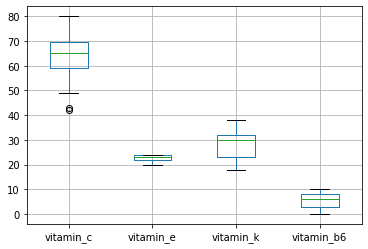

In [74]:
import matplotlib
#Exercise 5
supplements = pd.read_csv('supplements.csv')
supplements = supplements.fillna(method='bfill')
supplements = supplements.sort_values('vitamin_b6', ascending=False)

print(supplements, end='\n\n')

subset_df = supplements.drop(columns=['vitamin_d'])
print(subset_df, end='\n\n')

subset_df.boxplot(['vitamin_c', 'vitamin_e', 'vitamin_k', 'vitamin_b6'])
plt.show()







Exercise 6:
I noticed in the supplements Data that there seemed to be some outliers for vitamin C. Even though, vitamin C seems to be the one that is taken the most (in mg). There are a couple of outliers in the data. I also noticed that the median for vitamin e is really close to the min and max for both of those supplements.
